In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_root_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        36.0794 (32.9837, 43.2598) (32.5150, 42.1797)  9.6648 (Jnode 202)\n',
 't_n104        11.0383 ( 6.6364, 19.9686) ( 5.8279, 17.6805) 11.8526 (Jnode 201)\n',
 't_n105         9.9607 ( 6.3734, 15.6075) ( 5.9531, 14.7378)  8.7847 (Jnode 200)\n',
 't_n106         7.8221 ( 5.2668, 11.4231) ( 4.9911, 10.9725)  5.9814 (Jnode 199)\n',
 't_n107         7.4381 ( 5.0478, 10.7748) ( 4.8391, 10.4091)  5.5700 (Jnode 198)\n',
 't_n108         6.5820 ( 4.4802,  9.4485) ( 4.2605,  9.1183)  4.8579 (Jnode 197)\n',
 't_n109         3.2868 ( 2.2033,  4.7680) ( 2.1030,  4.6045)  2.5015 (Jnode 196)\n',
 't_n110         3.2578 ( 2.1830,  4.7224) ( 2.0825,  4.5599)  2.4774 (Jnode 195)\n',
 't_n111         3.1732 ( 2.1286,  4.5901) ( 2.0311,  4.4386)  2.4075 (Jnode 194)\n',
 't_n112         3.0639 ( 2.0574,  4.4247) ( 1.9677,  4.2838)  2.3162 (Jnode 193)\n',
 't_n113         2.8968 ( 1.9464,  4.1793) ( 1.8559,  4.0388)  2.1829 (Jnode 192)\n',
 't_n114         2.1082 ( 1.3317,  3.1381) ( 1.2723,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[36.0794,
 11.0383,
 9.9607,
 7.8221,
 7.4381,
 6.582,
 3.2868,
 3.2578,
 3.1732,
 3.0639,
 2.8968,
 2.1082,
 0.8437,
 0.5305,
 1.0702,
 2.117,
 1.7214,
 3.0194,
 2.8714,
 1.8176,
 1.4364,
 0.5355,
 1.1854,
 2.7715,
 2.5752,
 0.7383,
 3.0999,
 2.7795,
 1.7405,
 1.5092,
 1.7524,
 0.9031,
 0.6685,
 1.3224,
 6.0988,
 3.9293,
 6.7817,
 5.4522,
 3.7496,
 3.0619,
 2.3969,
 1.9178,
 1.1492,
 0.512,
 0.37,
 4.9843,
 4.2784,
 1.4771,
 0.5236,
 8.9129,
 7.0049,
 4.501,
 2.0751,
 5.4988,
 1.2731,
 3.6811,
 1.6544,
 10.3029,
 8.8127,
 6.0538,
 2.9452,
 2.4817,
 2.0034,
 1.2295,
 6.7465,
 3.4518,
 4.8489,
 7.8182,
 6.8419,
 6.5237,
 5.9187,
 5.2051,
 4.9691,
 4.7431,
 4.4401,
 3.9318,
 3.3528,
 1.907,
 2.5016,
 1.3396,
 1.1929,
 1.1486,
 4.4917,
 3.9741,
 3.7297,
 3.0479,
 1.6042,
 3.7041,
 2.8783,
 1.329,
 4.9601,
 4.4517,
 2.7765,
 2.5697,
 0.5983,
 1.8524,
 2.2156,
 1.7682,
 0.6332,
 7.0483,
 2.7917]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_root_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[36.1715,
 10.8794,
 9.3678,
 7.7164,
 7.2252,
 6.1958,
 3.4456,
 3.3998,
 3.223,
 3.0417,
 2.8537,
 2.0816,
 0.8793,
 0.5052,
 1.0745,
 2.1262,
 1.6664,
 3.0118,
 2.8141,
 1.8041,
 1.4055,
 0.5257,
 1.1517,
 2.7324,
 2.4785,
 0.8283,
 3.1746,
 2.8016,
 1.8071,
 1.4889,
 1.7528,
 0.9072,
 0.6642,
 1.4501,
 5.5733,
 3.8715,
 6.4488,
 5.1918,
 3.772,
 2.9924,
 2.2534,
 2.0477,
 1.2249,
 0.5482,
 0.3916,
 4.6533,
 3.913,
 1.3616,
 0.4979,
 7.9923,
 6.2532,
 4.1311,
 1.9792,
 4.848,
 1.1164,
 3.1454,
 1.3899,
 10.0616,
 8.5317,
 5.8491,
 2.9195,
 2.4314,
 1.8839,
 1.1754,
 6.7014,
 3.2068,
 4.7711,
 8.4958,
 7.0848,
 6.3855,
 5.7993,
 5.0437,
 4.7636,
 4.457,
 4.127,
 3.6048,
 2.9461,
 1.7156,
 2.3926,
 1.3054,
 1.082,
 1.0932,
 4.0653,
 3.5372,
 3.2712,
 2.6298,
 1.3323,
 3.2434,
 2.5402,
 1.214,
 4.6845,
 4.1053,
 2.5134,
 2.2054,
 0.5416,
 1.9107,
 2.4738,
 1.856,
 0.7053,
 7.3113,
 2.9413]

In [12]:
posterior_mean_iqtree

[36.0794,
 11.0383,
 9.9607,
 7.8221,
 7.4381,
 6.582,
 3.2868,
 3.2578,
 3.1732,
 3.0639,
 2.8968,
 2.1082,
 0.8437,
 0.5305,
 1.0702,
 2.117,
 1.7214,
 3.0194,
 2.8714,
 1.8176,
 1.4364,
 0.5355,
 1.1854,
 2.7715,
 2.5752,
 0.7383,
 3.0999,
 2.7795,
 1.7405,
 1.5092,
 1.7524,
 0.9031,
 0.6685,
 1.3224,
 6.0988,
 3.9293,
 6.7817,
 5.4522,
 3.7496,
 3.0619,
 2.3969,
 1.9178,
 1.1492,
 0.512,
 0.37,
 4.9843,
 4.2784,
 1.4771,
 0.5236,
 8.9129,
 7.0049,
 4.501,
 2.0751,
 5.4988,
 1.2731,
 3.6811,
 1.6544,
 10.3029,
 8.8127,
 6.0538,
 2.9452,
 2.4817,
 2.0034,
 1.2295,
 6.7465,
 3.4518,
 4.8489,
 7.8182,
 6.8419,
 6.5237,
 5.9187,
 5.2051,
 4.9691,
 4.7431,
 4.4401,
 3.9318,
 3.3528,
 1.907,
 2.5016,
 1.3396,
 1.1929,
 1.1486,
 4.4917,
 3.9741,
 3.7297,
 3.0479,
 1.6042,
 3.7041,
 2.8783,
 1.329,
 4.9601,
 4.4517,
 2.7765,
 2.5697,
 0.5983,
 1.8524,
 2.2156,
 1.7682,
 0.6332,
 7.0483,
 2.7917]

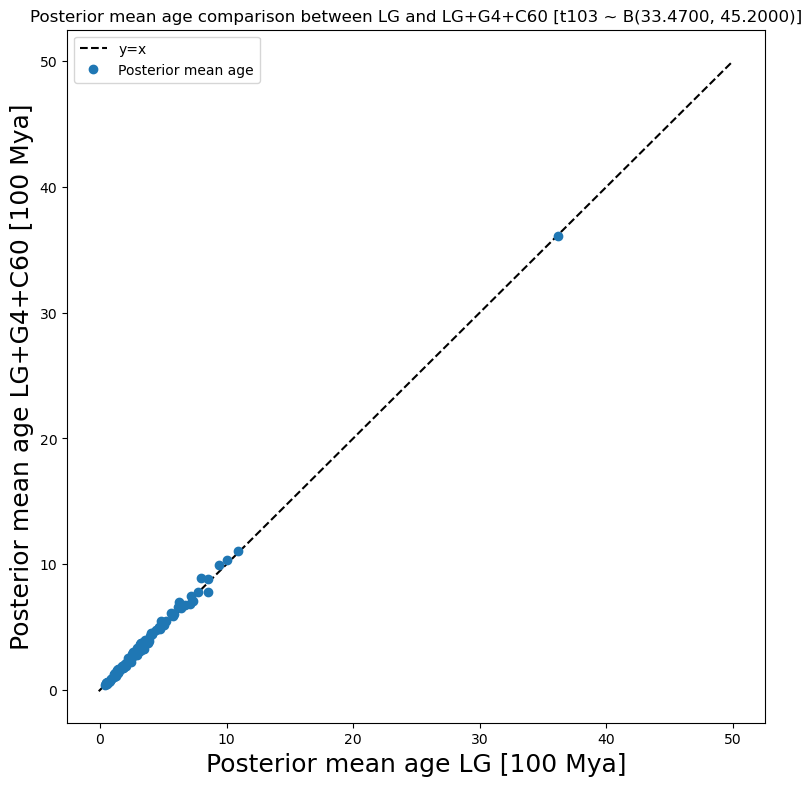

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [t103 ~ B(33.4700, 45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_root_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')